# Reading and Visualising Data with Pandas

Tamás Gál (tamas.gal@fau.de)

The latest version of this notebook is available at [https://github.com/Asterics2020-Obelics](https://github.com/Asterics2020-Obelics/School2017/tree/master/pandas)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as ml
import sys
plt = ml.pyplot
ml.rcParams['figure.figsize'] = (10.0, 5.0)

print("Python version: {0}\n"
      "Pandas version: {1}\n"
      "Matplotlib version: {2}"
      .format(sys.version, pd.__version__, ml.__version__))

Python version: 3.6.0 (default, Jan 30 2017, 16:11:40) 
[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]
Pandas version: 0.20.1
Matplotlib version: 2.0.0


In [2]:
from IPython.core.magic import register_line_magic

@register_line_magic
def shorterr(line):
    """Show only the exception message if one is raised."""
    try:
        output = eval(line)
    except Exception as e:
        print("\x1b[31m\x1b[1m{e.__class__.__name__}: {e}\x1b[0m".format(e=e))
    else:
        return output
    
del shorterr

## Exercise 1

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/mc_muons.csv`.

In [3]:
%shorterr neutrinos = pd.read_csv('data/neutrinos.csv')

SyntaxError: invalid syntax (<string>, line 1)


### Problems encountered

- the first few lines represent a plain header and need to be skipped
- comments are indicated with `$` at the beginning of the line
- the column separator is `:`
- the decimal delimiter is `,`
- the index column is the first one
- there is a footer to be excluded
- footer exclusion only works with the Python-engine

### Solution to exercise 1

In [4]:
neutrinos = pd.read_csv('data/neutrinos.csv',
                        skiprows=5,
                        comment='$',
                        sep=':',
                        decimal=',',
                        index_col=0,
                        skipfooter=1,
                        engine='python')

In [5]:
neutrinos.head(3)

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd
0,2.349537,1.116004,0.04899799823760986,3.3664,52.740,28.831,401.186,0.824351,0.175649
1,5.575786,1.742838,0.28047099709510803,3.8900,48.369,29.865,417.282,0.818363,0.181637
2,4.656125,2.686909,0.1198429986834526,3.2335,71.722,121.449,363.077,0.828343,0.171657


## Exercise 2

Create a histogram of the neutrino energies.

### Solution to exercise 2

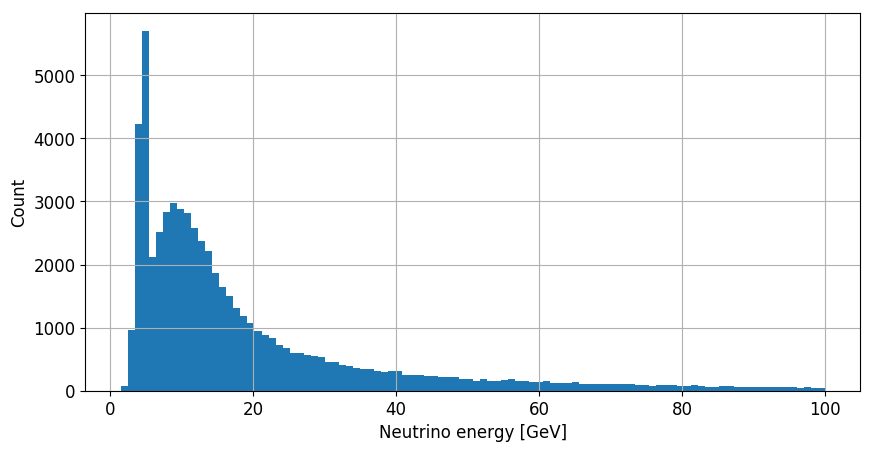

In [6]:
neutrinos.energy.hist(bins=100)
plt.xlabel('Neutrino energy [GeV]');
plt.ylabel('Count');

## Exercise 3

Use the `pd.read_csv()` function to create a `DataFrame` from the dataset `data/reco.csv`.

### Problems encountered

- need to define index column

### Solution to exercise 3

In [7]:
reco = pd.read_csv('data/reco.csv', index_col=0)
reco.head()

,zenith,azimuth,energy_muon,energy_neutrino,bjorken_y,quality,pos_x,pos_y,pos_z
0,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437
3,2.016892,0.621110,6.099985,6.643886,0.625,-4.556744,-48.878254,-86.933884,-57.699791
4,1.944401,3.030613,4.212069,5.967662,0.125,-4.927643,-32.267179,26.163239,-12.441818


## Exercise 4

Combine the `neutrinos` and `reco` `DataFrames`  using `pd.concat()`

### Problems encountered

- need to define the right axis
- identical column names should be avoided

### Solution to exercise 4

In [8]:
data = pd.concat([neutrinos, reco.add_prefix('reco_')], axis=1)

In [9]:
data.head(3)

,azimuth,zenith,bjorkeny,energy,pos_x,pos_y,pos_z,proba_track,proba_cscd,reco_zenith,reco_azimuth,reco_energy_muon,reco_energy_neutrino,reco_bjorken_y,reco_quality,reco_pos_x,reco_pos_y,reco_pos_z
0,2.349537,1.116004,0.04899799823760986,3.3664,52.740,28.831,401.186,0.824351,0.175649,1.138133,2.180345,0.291326,1.968828,0.125,-4.354237,48.916672,32.404689,-6.251441
1,5.575786,1.742838,0.28047099709510803,3.8900,48.369,29.865,417.282,0.818363,0.181637,1.501718,4.300291,2.247325,3.973614,0.125,-4.853344,59.164913,26.016755,12.737107
2,4.656125,2.686909,0.1198429986834526,3.2335,71.722,121.449,363.077,0.828343,0.171657,2.160066,4.228711,1.748958,3.390933,0.125,-3.836176,69.988323,116.081679,-35.060437


In [10]:
data.columns

Index(['azimuth', 'zenith', 'bjorkeny', 'energy', 'pos_x', 'pos_y', 'pos_z',
       'proba_track', 'proba_cscd', 'reco_zenith', 'reco_azimuth',
       'reco_energy_muon', 'reco_energy_neutrino', 'reco_bjorken_y',
       'reco_quality', 'reco_pos_x', 'reco_pos_y', 'reco_pos_z'],
      dtype='object')

## Exercise 5

Make a scatter plot to visualise the zenith reconstruction quality.

### Problems encountered

- `DataFrame.plot()` is not suited to do scatter plots (inverts axis, sets weird limits etc.)

#### Sometimes it's better not to fight against `DataFrame.plot()`, just switch to Matplotlib ;)

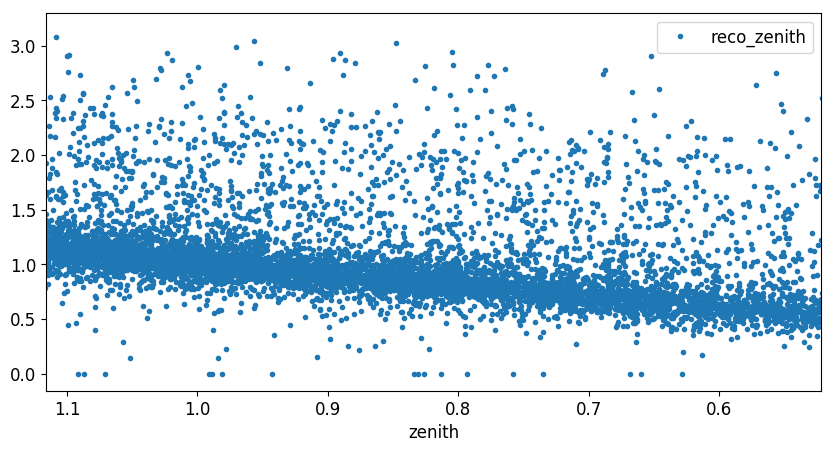

In [11]:
data.plot(x='zenith', y='reco_zenith', style='.');  # Yay!

### Solution to exercise 5, using `plt.scatter()`

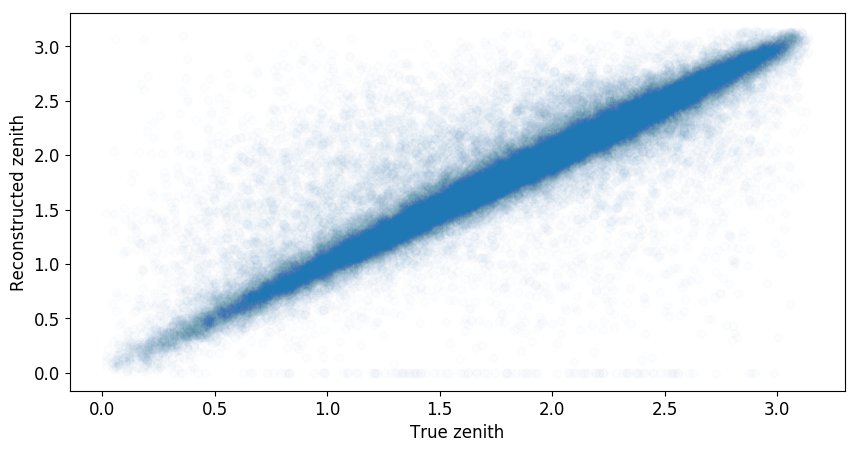

In [12]:
plt.scatter(data['zenith'], data['reco_zenith'], alpha=0.01);
plt.xlabel('True zenith');
plt.ylabel('Reconstructed zenith');

### Solution to exercise 5, using `plt.hist2d()`

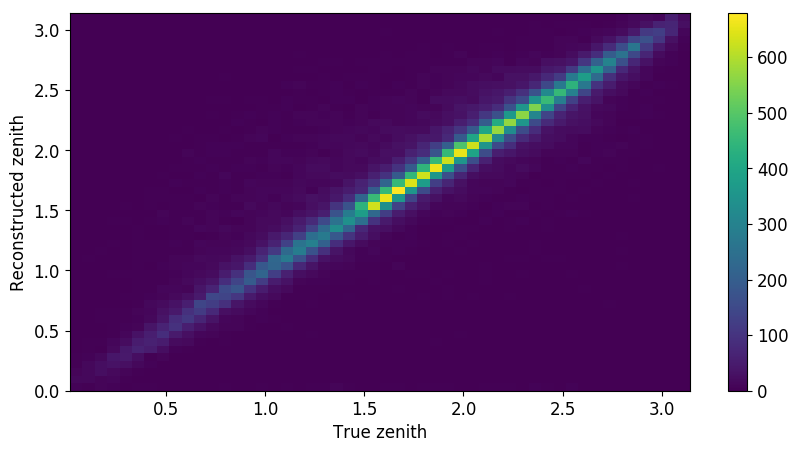

In [13]:
plt.hist2d(data['zenith'], data['reco_zenith'], bins=50);
plt.xlabel('True zenith');
plt.ylabel('Reconstructed zenith');
plt.colorbar();

## Exercise 6

Create a histogram of the cascade probabilities (__`neutrinos`__ dataset: `proba_cscd` column) for the energy ranges 1-5 GeV, 5-10 GeV, 10-20 GeV and 20-100 GeV.

### Solution to exercise 6

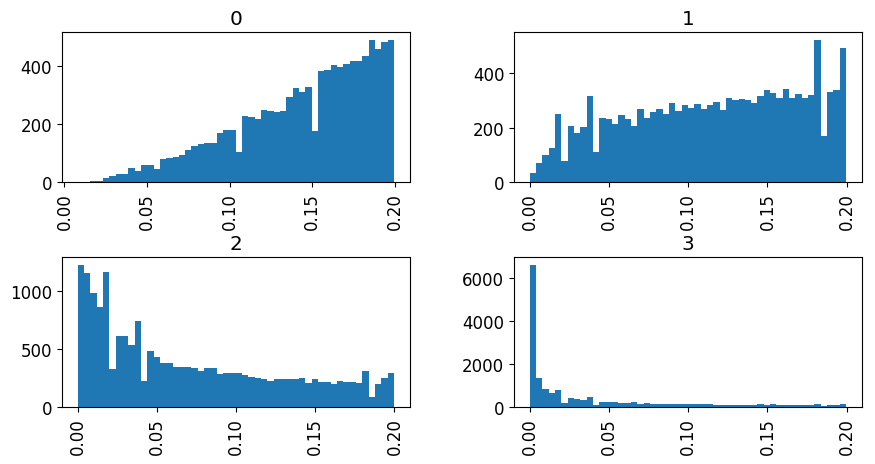

In [14]:
ebins = [1, 5, 10, 20, 100]
neutrinos['ebin'] = pd.cut(neutrinos.energy, ebins, labels=False)
neutrinos.hist('proba_cscd', by='ebin', bins=50);

## Acknowledgements
![](images/eu_asterics.png)

This tutorial was supported by the H2020-Astronomy ESFRI and Research Infrastructure Cluster (Grant Agreement number: 653477).